<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Financial Time Series

In [44]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

## Financial Data

### Data Import

In [2]:
filename = './source/tr_eikon_eod_data.csv'  

In [3]:
f = open(filename, 'r')  
f.readlines()[:5]  

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-01,,,,,,,,,1.4323,1096.35,,\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n']

包括一些大公司的股价和指数，黄金的指数，汇市的交易汇率。

In [3]:
data = pd.read_csv(filename,  
                   index_col=0, 
                   parse_dates=True)  

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [5]:
data.head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [6]:
data.tail()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


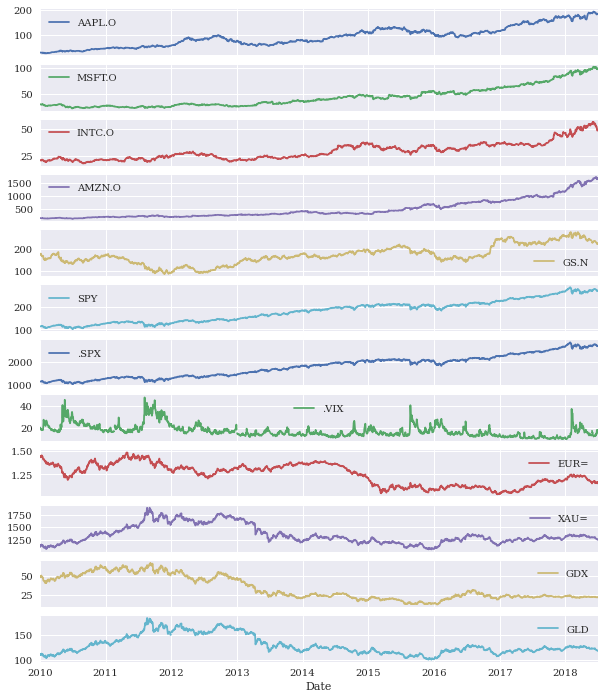

In [7]:
data.plot(figsize=(10, 12), subplots=True);  
# plt.savefig('../../images/ch08/fts_01.png');

In [9]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

全称

In [10]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


将data.columns数据的列名, instruments全称zip一一对应起来，然后再将里面的元素一一读出来赋予给ric和name。

'{:8s} | {}'.format(a,b)将ab放入前面的格式中去，中间用|隔开。8s代表8个栏框，里面的形式是str字符串。

### Summary Statistics

In [8]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [9]:
data.describe().round(2)  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [10]:
data.mean()  

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [11]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


不同的显示数据统计信息的方法：info是大致信息几行几列，数据类型，describe是数据的统计指标，也可以通过mean()之类的函数直接返回出单一的统计指标，data.aggregate里面用[]list的方式整合需要的指标，形成表格，columns就是data的columns，index就是设定好的list里面的指标。

### Changes Over Time看差异

In [13]:
data.diff().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


diff就是看今天和昨天之间变化：直接相减

In [15]:
data.diff().mean()  

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

变化的平均数，但是还是绝对数值，两个之间无法相比。

In [16]:
data.pct_change().round(3).head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


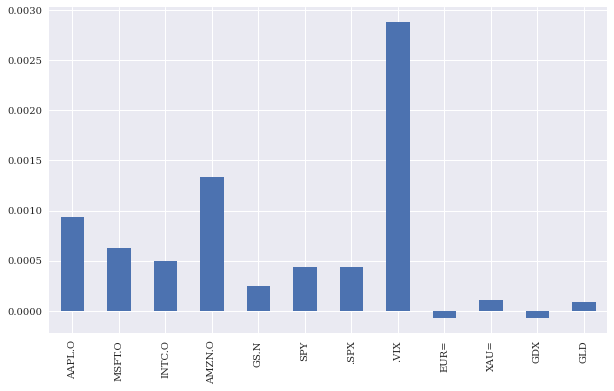

In [18]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_02.png');

pct_change是简单报酬率，今天价格减昨天价格的差值再除以昨天的价格，相比直接的相减，这个指标可以在两组数据之间相比较了。

In [17]:
rets = np.log(data / data.shift(1))  

In [18]:
rets.head().round(3)  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


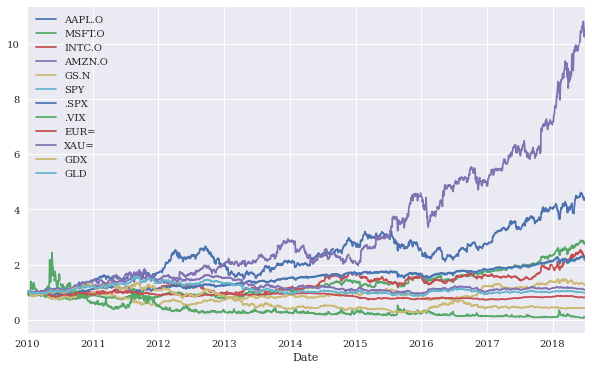

In [19]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_03.png');

连续时间的报酬率，具有可加性，利用了对数相加，括号里面的数相乘的性质，里面的数始终是P1/P0的形式。

rets.cumsum().apply(np.exp)连续时间的报酬率还原成价值(最初的价值是1，就是看最后的结果相比1是大了，还是小了来判定涨跌和涨跌的具体数值)的形式需要通过累加函数cumsum和np.exp取指数，将原本的lnx变成e^(lnx)的形式，将x的值取出(x值就是价值)。apply()对之前的数据进行括号里面的函数操作。

 data.shift(1)前一位的值，2019-01-02/2019-01-01 -> data/ data.shift(1)

### Resampling 重抽样，改变频率，增加或者减少，日数据变成周数据。

重抽样的关键是取哪一边的值代表这一区间，财务上一般追求right label：将右边的值作为这一区间的代表.

抽样里面label的取值要符合常识，一般右取值代表数据采用的多是实点数据，静态，比方说股价，看的是2010-01-10当天的具体股价，不在意开始那一天的股价。

In [24]:
data.resample('1w', label='right').last().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


rasample之后的df不是普通的df，所以直接看head或者tail会报错：'DatetimeIndexResampler' object has no attribute 'head'，要加last().

In [25]:
data.resample('1m', label='right').last().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


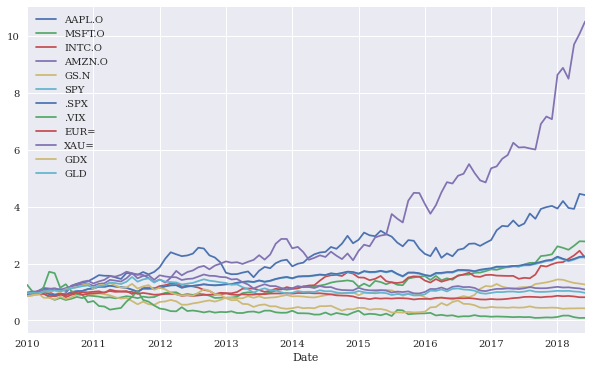

In [26]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last(
                          ).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_04.png');

增加了resample('1m', label='right').last()来resample数据，用月数据来看就没有很多的节点，线看上去更加平滑。

## Rolling Statistics滚动统计

In [27]:
sym = 'AAPL.O'

In [28]:
data = pd.DataFrame(data[sym]).dropna()

dropna()去掉NaN值

In [30]:
data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


### An Overview

window视窗，多少的数算一次滚动的平均数

In [31]:
window = 20  

In [32]:
data['min'] = data[sym].rolling(window=window).min()  

In [33]:
data['mean'] = data[sym].rolling(window=window).mean()  

In [34]:
data['std'] = data[sym].rolling(window=window).std()  

In [35]:
data['median'] = data[sym].rolling(window=window).median()  

In [36]:
data['max'] = data[sym].rolling(window=window).max()  

In [37]:
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()  

In [38]:
data.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.818544,27.437544,29.580892,0.933650,29.821542,30.719969,27.805432
2010-02-02,27.979972,27.437544,29.451249,0.968048,29.711113,30.719969,27.936337
2010-02-03,28.461400,27.437544,29.343035,0.950665,29.685970,30.719969,28.330134
2010-02-04,27.435687,27.435687,29.207892,1.021129,29.547113,30.719969,27.659299
2010-02-05,27.922829,27.435687,29.099892,1.037811,29.419256,30.719969,27.856947


### rolling(window=window)后面可以接需要进行的统计数据计算可以是min,mean,std,median,max;视窗为20:20个数一计算

#### ema5(第五天ewma的结果) = p5(当前天数的值) * a(设定好的权重) + (1 - a) * ema4(第4天的ewma)，如果设定a = 0.06，1 - a就是0.94，每次新的data进来就在原先权重的基础上 * 0.96，所以权重会不断变小，ema4 = p4 * a + (1-a)ema3, 所以可以不断套娃:ema5 = p5 * a + (1 - a) * (p4 * a + (1-a) * ema3).

#### a的值有很多种写法：halflife=0.5，意味着半衰期的方式并且参数为0.5，-> (1 - a)^n = 0.5,反过来算出a的具体值。alpha = 1 - \exp\left(-\ln(2)

#### min_periods=window手动设定开始进行计算的最小data数量，可以设定的＜20，减少数据的浪费。

#### adjust : bool, default True，因为最后的权重依然是a * (1 - a)^19, 虽然无限接近于1，但是还是不为1，默认的是 adjust = True，就是在到当前计算的那一天的数据的时候，将a * (1 - a)^19变为1，使得ewma符合最初的理论上的设定。

In [55]:
data.ewm?

### rolling的计算是非加权的，evma是加权的，加权的好处是明确近期的数据会比远期的数据更加重要，更加能够反映当前的情况，所以近期的数据会赋予更高的权重，而距离当前第20期的数据的权重是1/20,当期是1，在20以外的就自动赋予权重为0.

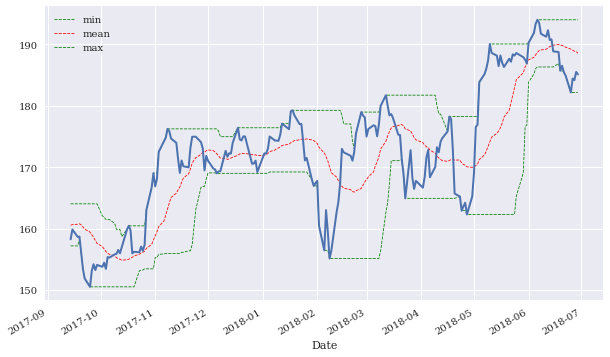

In [36]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);  
# plt.savefig('../../images/ch08/fts_05.png');

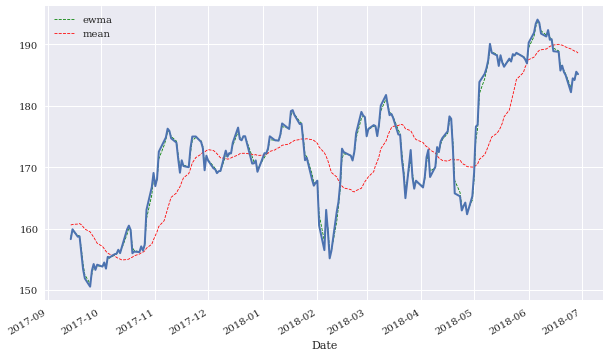

In [48]:
ax = data[['ewma', 'mean']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);  

iloc[-200:]意思是将手机的后200位抓出来。

#### ewma的曲线更加接近sym本身的曲线，而rolling-mean曲线更加平滑，因为ewma加入了权重的因素更加贴近原值，而rolling-mean没有考虑权重，意味着老的数据和新的数据一样，因此曲线的涨跌变化会放缓，不会出现像原曲线一样陡然的增减，因此相比之下ewma更加能够反映出变化的情况。

### A Technical Analysis Example技术分析

In [56]:
data['SMA1'] = data[sym].rolling(window=42).mean()  

In [57]:
data['SMA2'] = data[sym].rolling(window=252).mean()  

window=42代表的是两个工作日，252代表是一年的工作日

In [59]:
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


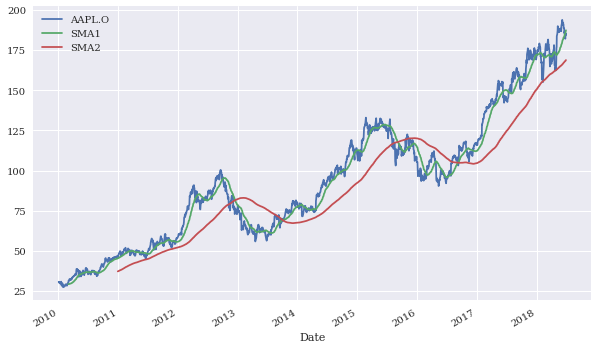

In [40]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_06.png');

### 技术分析上的黄金交叉，就是快的线(42天的线)和慢的线(252天的线)交叉,在交叉点之后，快线高于慢线，意味着可做多盈利；相反如果快线低于慢线就是死亡交叉，需要尽快抛售然后做空。

In [41]:
data.dropna(inplace=True)  

In [60]:
data.head()

,AAPL.O,min,mean,std,median,max,ewma,SMA1,SMA2
Date,,,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.282827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)  

data多了一栏，反应快线和慢线间的高低关系，where写的是如果快线值大于慢线就是1，反之是-1

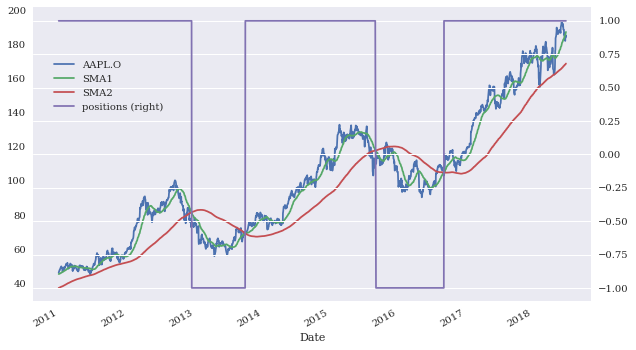

In [43]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
                                              secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch08/fts_07.png');

secondary_y='positions'，另外立一个y轴，刻度和之前的不同，如果里面是直接放data，就是按这个data来定新的y轴的刻度。

.set_bbox_to_anchor((0.25, 0.85))将legend图例固定在一个相对的有x轴和y轴坐标确定的位置。

#### 实操当中一般用开盘价来做值，当然没有收盘价准确，但是用收盘价需要你预估当天的收盘价，从而确定做多或者做空第二天的股价来获得利润，而股市变化巨大，所以一旦预测错误，这个模型会不准。

## Regression Analysis相关性分析

### The Data

In [64]:
# EOD data from Thomson Reuters Eikon Data API
raw = pd.read_csv('./source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [65]:
data = raw[['.SPX', '.VIX']].dropna()

In [69]:
data.head()

,.SPX,.VIX
Date,,
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
2010-01-08,1144.98,18.13


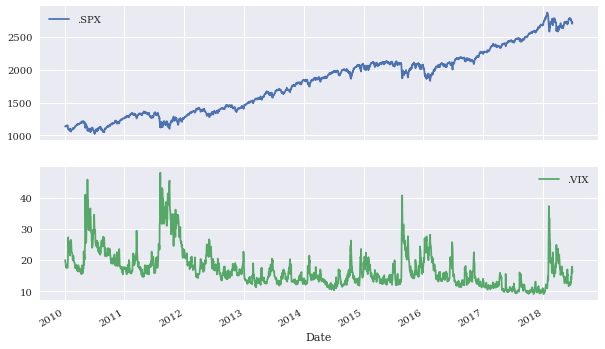

In [67]:
data.plot(subplots=True, figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_08.png');

从长期来看可能存在负相关的关系，但是相关性不明显。

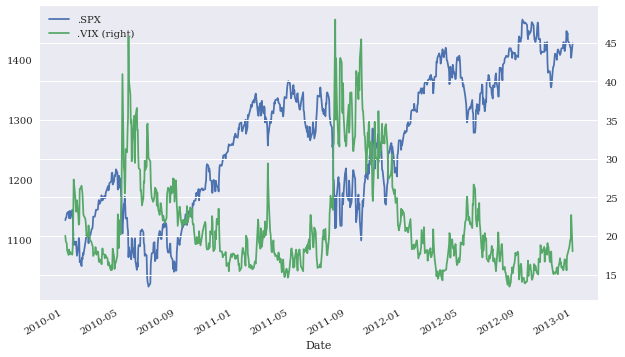

In [68]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_09.png');

loc[:'2012-12-31']取出从最初的2010-01-04一直到2012-12-31(包括2012-12-31当天)的数据。

secondary_y='.VIX'有点类似于subplots加twinex的效果，一个图里面画两个Y轴刻度不同的线。

### Log Returns

In [71]:
rets = np.log(data / data.shift(1)) 

In [72]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [73]:
rets.dropna(inplace=True)

算连续时间的报酬率

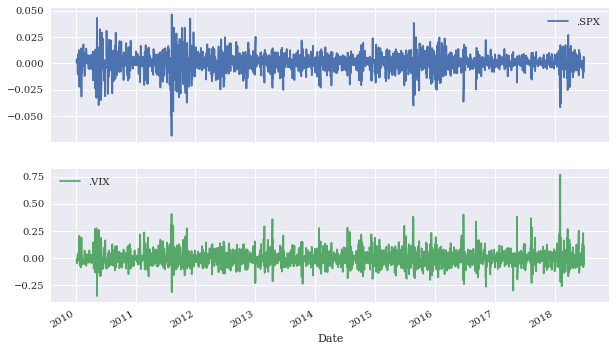

In [75]:
rets.plot(subplots=True, figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_10.png');

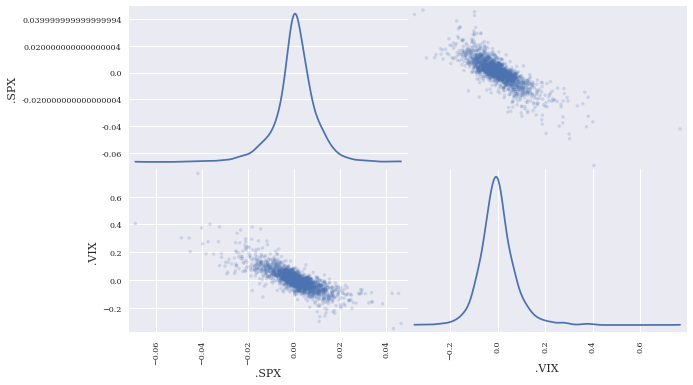

In [86]:
pd.plotting.scatter_matrix(rets, alpha=0.2,  
                           diagonal= 'kde', figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_11.png');

D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='.SPX', ylabel='.SPX'>,
        <AxesSubplot:xlabel='.VIX', ylabel='.SPX'>],
       [<AxesSubplot:xlabel='.SPX', ylabel='.VIX'>,
        <AxesSubplot:xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

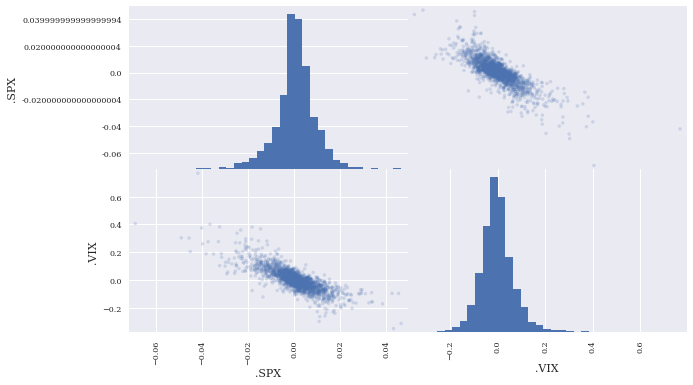

In [84]:
pd.plotting.scatter_matrix(rets, alpha=0.2,  
                           diagonal= 'hist',  
                           hist_kwds={'bins': 35}, figsize=(10, 6) )

In [82]:
?pd.plotting.scatter_matrix 'hist',  
                           hist_kwds={'bins': 35}  

### 从hist可以看出财务数据的基本特征(对比标准正态分布(峰度3，偏度0)):高狭缝：中间的medium/mean的部位接近于0出现的频率高于标准正态分布，意味着大多数时间金融市场都是不涨不跌的；厚尾的情况:正常在标准正态分布里面多于3个标准差之外的值基本上不太可能出现(概率极度小)，可以定义为outer异常值，但是在金融市场中出现极端情况的时候也不少，极端值的概率要比正态分布数据出现极端值的概率大。

### 因此，不能简单的用正态分布去拟合金融市场数据的分布，从而做一些统计推断。一般来说，通过实证分析发现，自由度为5或6的t分布拟合的较好。

### 大部分权益类金融产品的回报率的概率分布呈现出leptokurtic的特征。这种概率分布相对于标准正态分布，峰度更高，两段的尾部更厚，也就是极值更多的意思。(权益类金融产品就是股票，股市这种特征更加明显)

### scatter_matrix是主对角线放各组数据的直方图hist(title就是这个column的名称，如.SPX)，同时两个column作为X轴和Y轴的散点图。

#### alpha透明度，diagonal='hist'对角线的图形种类,还可以是'kde':就是趋势图(用平滑的曲线将hist里面每个bar的中点连起来)；hist_kwds={'bins': 35}  就是关于hist的一些参数。

### OLS Regression最小二乘法回归

polyfit的方法不是机器学习的方法，而是多项式配式的方法

In [92]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)  

deg=1一次方(最高次方)

In [93]:
reg

array([-6.65160028e+00,  2.62132142e-03])

前面的是k值斜率，后面的是截距b，斜率是负的，所以是负相关。

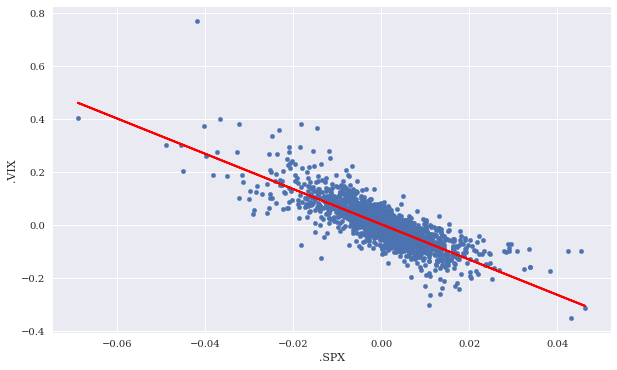

In [94]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))  
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);  
# plt.savefig('../../images/ch08/fts_12.png');

np.polyval(reg, rets['.SPX'])y值的表达式的结果,（前面是表达式，后面是x的数组），polyval只能用于多项式的计算，表达式只能够是多项式。

### Correlation

In [91]:
rets.corr()  

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


corr()相关性矩阵，相关系数是-0.804382 -> 总的

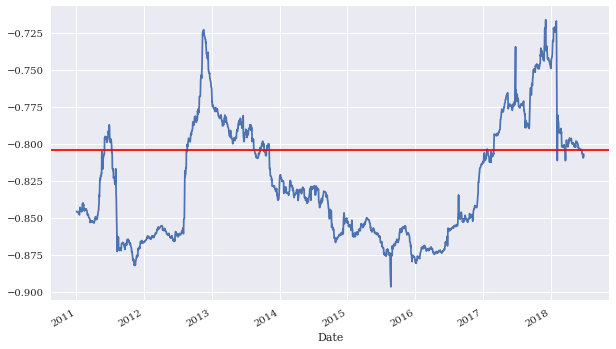

In [95]:
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX'])
.plot(figsize=(10, 6))  
ax.axhline(rets.corr().iloc[0, 1], c='r');  
# plt.savefig('../../images/ch08/fts_13.png');

axhline在画幅上画水平线，y =-0.804382, 不同时期的相关性系数有高有低，但是整体上是在-0.725到-0.9之间。

## High Frequency Data高频数据

In [96]:
# from fxcmpy import fxcmpy_tick_data_reader as tdr
# data = tdr('EURUSD', start='2018-6-25', end='2018-06-30')
# data.get_data(start='2018-6-29',
#               end='2018-06-30').to_csv('../../source/fxcm_eur_usd_tick_data.csv')

In [98]:
%%time
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv('./source/fxcm_eur_usd_tick_data.csv',
                     index_col=0, parse_dates=True)

Wall time: 690 ms


In [99]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     461357 non-null  float64
 1   Ask     461357 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


### 每秒钟的交易数据，在6月29号一天之内，用的是汇率，因为汇市是基本上无休市时间的所以是0点到21点。

In [102]:
tick['Mid'] = tick.mean(axis=1)  

将Ask和Bid做平均，固定1轴，对0轴做平均

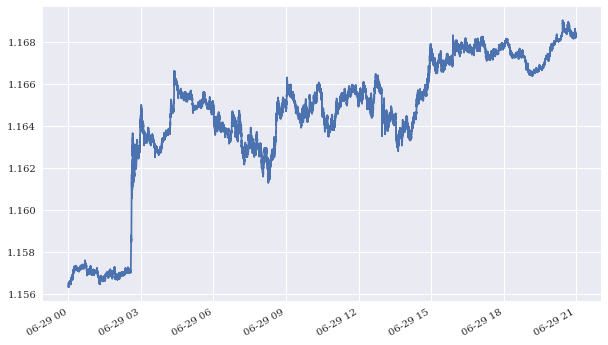

In [106]:
tick['Mid'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_14.png');

In [104]:
tick_resam = tick.resample(rule='5min', label='right').last()

系统默认的分钟对应的label是左边，设定label='right'，因为是看股价，所以设定为右边更加符合常识，以结束时候的股价作为区间的股价

In [108]:
tick.resample?

resample改为5分钟抽一次，

In [109]:
tick_resam.head()

,Bid,Ask,Mid
2018-06-29 00:05:00,1.15649,1.15651,1.156500
2018-06-29 00:10:00,1.15671,1.15672,1.156715
2018-06-29 00:15:00,1.15725,1.15727,1.157260
2018-06-29 00:20:00,1.15720,1.15722,1.157210
2018-06-29 00:25:00,1.15711,1.15712,1.157115


In [111]:
tick_resam.shape

(252, 3)

将461357个数据简化为了252个数据，所以数据更加平滑。

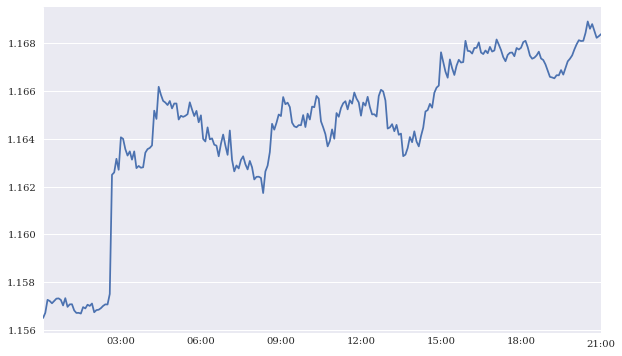

In [113]:
tick_resam['Mid'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_15.png');

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>